### Importing the Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

### Loading the Data

In [2]:
# Loading the data using pandas
data = pd.read_csv('Transport.csv')

### Statistical Summary Of Data

#### Displaying top 5 rows

In [3]:
# Display the first few rows of the dataframe
data.head(5)

,User Name,Mode of Transport,Distance Traveled (In Miles),Frequency(Per Week),Start Location,End Location,Fuel Type,Fuel Efficiency,Monthly Emissions (kg CO2)
0,Kim Smith,Car,25,5,Sunnyvale,San Francisco,gasoline,21,209.52
1,Tim Nova,Car,22,4,San Jose,Stanford,electric,28,110.63
2,Leslie Kleina,Car,18,4,San Carlos,Sunnyvale,electric,22,115.20
3,Mary Jane,Car,19,4,Palo Alto,San Francisco,gasoline,24,111.47
4,John Doe,Car,10,5,Mountain View,Santa Clara,electric,20,88.00


In [4]:
#### Checking for Missing Values

In [5]:
# Check for missing values
data.isnull().sum()

User Name                       0
Mode of Transport               0
Distance Traveled (In Miles)    0
Frequency(Per Week)             0
Start Location                  0
End Location                    0
Fuel Type                       0
Fuel Efficiency                 0
Monthly Emissions (kg CO2)      0
dtype: int64

In [6]:
#### Checking for Data Types

In [7]:
# Check data types
data.dtypes

User Name                        object
Mode of Transport                object
Distance Traveled (In Miles)      int64
Frequency(Per Week)               int64
Start Location                   object
End Location                     object
Fuel Type                        object
Fuel Efficiency                   int64
Monthly Emissions (kg CO2)      float64
dtype: object

In [8]:
# Statistical summary
data.describe()

,Distance Traveled (In Miles),Frequency(Per Week),Fuel Efficiency,Monthly Emissions (kg CO2)
count,149.000000,149.000000,149.000000,149.000000
mean,16.228188,2.865772,25.107383,64.227919
std,6.789420,1.417352,3.047243,40.199842
min,1.000000,1.000000,20.000000,3.520000
25%,11.000000,2.000000,23.000000,30.400000
50%,16.000000,3.000000,25.000000,58.260000
75%,21.000000,4.000000,27.000000,91.200000
max,40.000000,5.000000,30.000000,209.520000


### Data Visualization

#### Correlation Heatmap

/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_37299/2731755904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


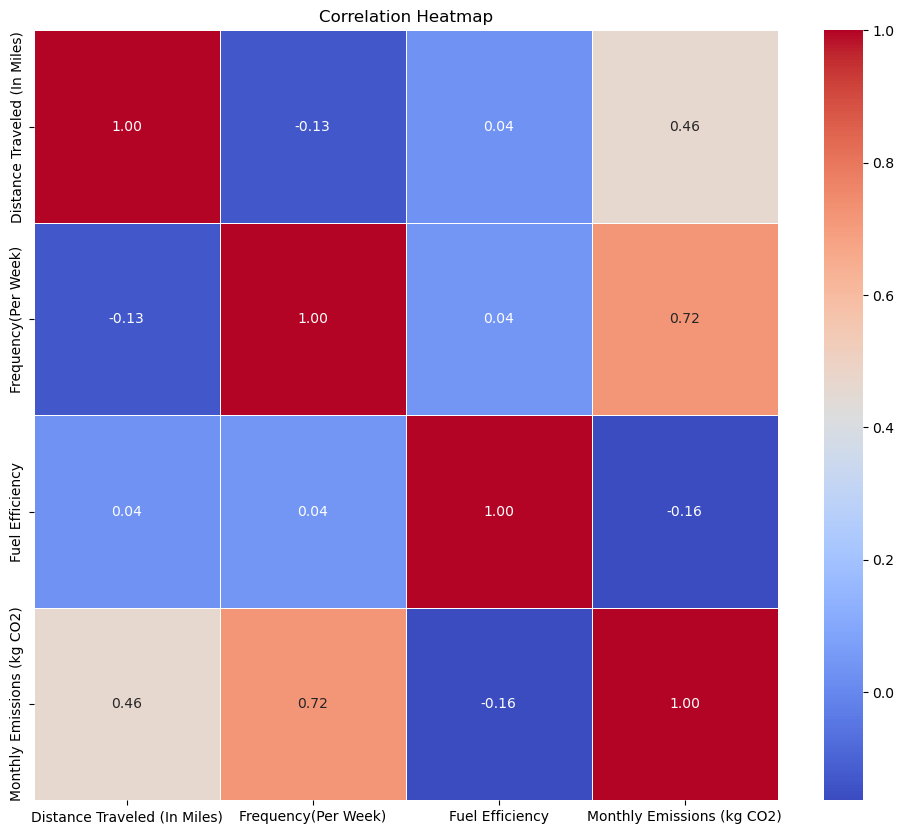

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:

# Emission factors for different fuel types and modes of transport
emission_factors_car = {
    "gasoline": 2.31,  # average emission factor for gasoline cars
    "electric": 0.5    # estimated average emission factor for electric cars
}

emission_factors_bike = {
    "gasoline": 1.20,  # average emission factor for gasoline bikes
    "electric": 0.13   # estimated average emission factor for electric bikes
}
 

### Applying the Algorithm

#### Without Splitting

In [11]:
label_encoders = {}
for col in ['Mode of Transport', 'Fuel Type']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Features and target variable
features = data[['Distance Traveled (In Miles)', 'Fuel Type', 'Fuel Efficiency']]
target = data['Monthly Emissions (kg CO2)']



### Linear Regression 

In [12]:
from sklearn.linear_model import LinearRegression
model_lin_reg = LinearRegression()
model_lin_reg.fit(features, target)
# Making predictions on the entire dataset
predictions = model_lin_reg.predict(features)

# Calculate accuracy (R-squared)
accuracy = model_lin_reg.score(features, target)

# Evaluating the model
mse = mean_squared_error(target, predictions)
mae = mean_absolute_error(target, predictions)
r2 = r2_score(target, predictions)
explained_variance = explained_variance_score(target, predictions)

#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.24702461902457873
Mean Squared Error: 1208.6621249916236
Mean Absolute Error: 28.204442884661784
R-squared Score: 0.24702461902457873
Explained Variance Score: 0.24702461902457873


### Decision Tree Regressor model

In [13]:
# Creating and fitting the Decision Tree Regressor model
model_decision_tree = DecisionTreeRegressor(random_state=42)
model_decision_tree.fit(features, target)

# Making predictions on the entire dataset
predictions = model_decision_tree.predict(features)

# Calculate accuracy (R-squared)
accuracy = model_decision_tree.score(features, target)

# Evaluating the model
mse = mean_squared_error(target, predictions)
mae = mean_absolute_error(target, predictions)
r2 = r2_score(target, predictions)
explained_variance = explained_variance_score(target, predictions)

#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.9144969073341515
Mean Squared Error: 137.24797953020135
Mean Absolute Error: 4.278590604026846
R-squared Score: 0.9144969073341515
Explained Variance Score: 0.9144969073341515


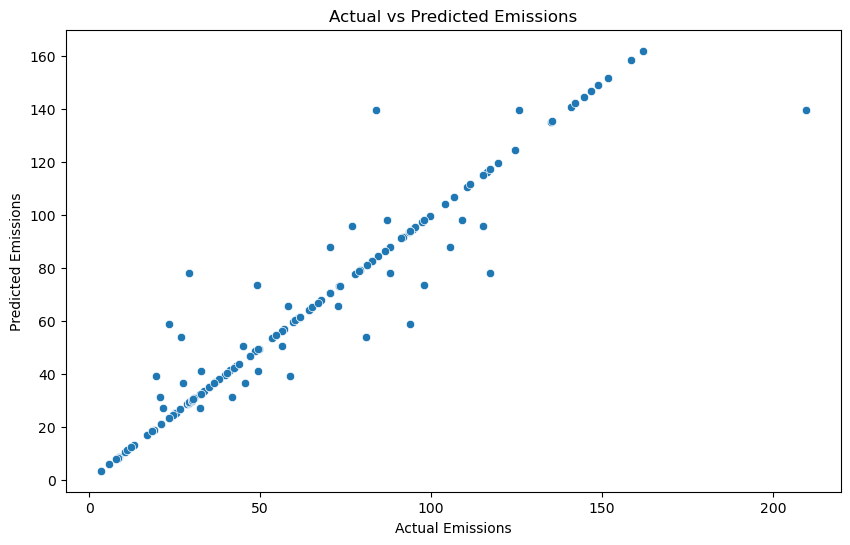

In [14]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=target, y=predictions)
plt.title('Actual vs Predicted Emissions')
plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.show()

#### Gradient Boosting Regressor

In [15]:
# Creating and fitting the Gradient Boosting Regressor model on the entire dataset
model_gradient_boosting = GradientBoostingRegressor(random_state=42)
model_gradient_boosting.fit(features, target)

# Making predictions on the entire dataset
predictions = model_gradient_boosting.predict(features)

# Calculating the accuracy 
accuracy = model_gradient_boosting.score(features, target)

# Evaluating the model
mse = mean_squared_error(target, predictions)
mae = mean_absolute_error(target, predictions)
r2 = r2_score(target, predictions)

#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Accuracy (R-squared): 0.6453256108621515
Mean Squared Error: 569.3167554829408
Mean Absolute Error: 18.397891121123187
R-squared Score: 0.6453256108621515


#### Random Forest Regressor

In [16]:
# Standardize the features with feature names
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Creating and fitting the Random Forest Regressor model on the entire dataset
model_random_forest = RandomForestRegressor(random_state=42)
model_random_forest.fit(features, target)

# Making predictions on the entire dataset
predictions = model_random_forest.predict(features)

# Calculating the accuracy 
accuracy = model_random_forest.score(features, target)

# Evaluating the model
mse = mean_squared_error(target, predictions)
mae = mean_absolute_error(target, predictions)
r2 = r2_score(target, predictions)

#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Accuracy (R-squared): 0.8304510852299407
Mean Squared Error: 272.1567753656648
Mean Absolute Error: 12.351993922978599
R-squared Score: 0.8304510852299407


#### With Splitting

In [17]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Linear Regression

In [18]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)
# Making predictions on the entire dataset
predictions = model_lin_reg.predict(X_train)

# Calculate accuracy (R-squared)
accuracy = model_lin_reg.score(X_train, y_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
explained_variance = explained_variance_score(y_train, predictions)

#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.32730974138647706
Mean Squared Error: 1212.1889871296012
Mean Absolute Error: 28.23865356112911
R-squared Score: 0.32730974138647706
Explained Variance Score: 0.32730974138647706


### Decision Tree Regressor model

In [19]:
# Creating and fitting the Decision Tree Regressor model
model_decision_tree = DecisionTreeRegressor(random_state=42)
model_decision_tree.fit(X_train, y_train)

# Making predictions on the entire dataset
predictions = model_decision_tree.predict(X_train)

# Calculate accuracy (R-squared)
accuracy = model_decision_tree.score(X_train, y_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
explained_variance = explained_variance_score(y_train, predictions)

#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.9144316591422977
Mean Squared Error: 154.19429537815128
Mean Absolute Error: 4.027310924369749
R-squared Score: 0.9144316591422977
Explained Variance Score: 0.9144316591422977


### Gradient Boosting Regressor

In [20]:
# Creating and fitting the Gradient Boosting Regressor model
model_gradient_boosting = GradientBoostingRegressor(random_state=42)
model_gradient_boosting.fit(X_train, y_train)

# Making predictions on the test set
predictions = model_gradient_boosting.predict(X_train)

#Accuracy
accuracy = model_gradient_boosting.score(X_train, y_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
explained_variance = explained_variance_score(y_train, predictions)

# Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.749376033696787
Mean Squared Error: 451.624812420597
Mean Absolute Error: 16.295252281577145
R-squared Score: 0.749376033696787
Explained Variance Score: 0.749376033696787


### Random Forest Regressor model

In [21]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Making predictions on the entire dataset
predictions = rf_model.predict(X_train)

# Calculating the accuracy 
accuracy = rf_model.score(X_train, y_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Accuracy (R-squared): 0.8305204783207587
Mean Squared Error: 305.402385560038
Mean Absolute Error: 12.87525012605043
R-squared Score: 0.8305204783207587


### Pie Chart

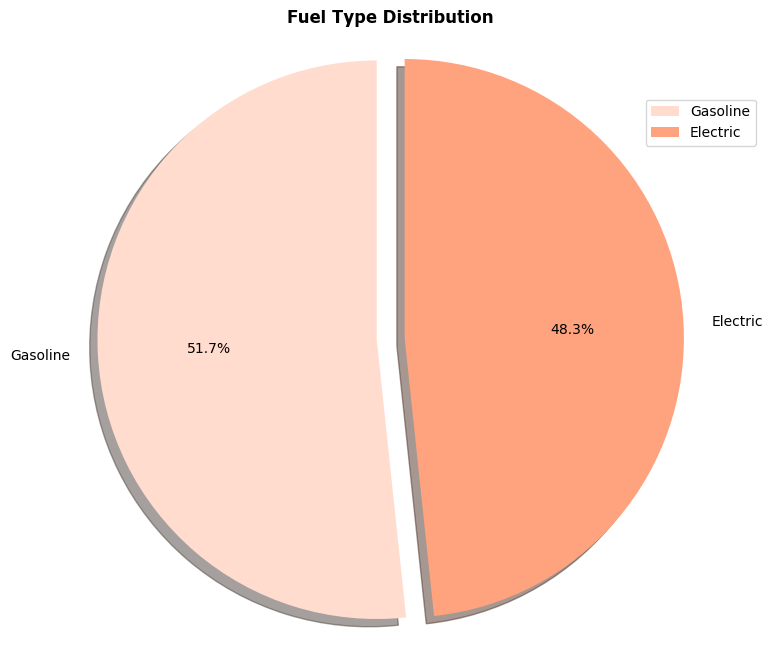

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

plt.figure(figsize=(8, 8))

# Assuming 0 corresponds to 'gasoline' and 1 corresponds to 'electric'
fuel_type_counts = data['Fuel Type'].map({0: 'Gasoline', 1: 'Electric'}).value_counts()

# Define colors and explode
colors = ['#FFDCCE', '#FFA37E']
explode = (0, 0.1)

plt.pie(fuel_type_counts, explode=explode, labels=fuel_type_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, shadow=True)

# Set custom font for the title
title_font = font_manager.FontProperties(family='Verdana', style='normal', weight='semibold', size=12)
plt.title('Fuel Type Distribution', fontproperties=title_font)
plt.ylabel('')  # Remove the y-axis label

# Add legend
plt.legend(fuel_type_counts.index, loc="best", bbox_to_anchor=(0.9, 0.9))

# Save the plot as an image
plt.savefig('fuel_type_distribution.png', dpi=300, bbox_inches='tight')

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()


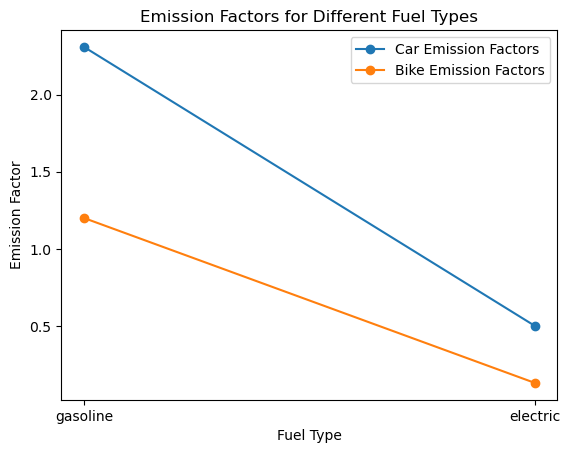

In [23]:
plt.plot(emission_factors_car.values(), label='Car Emission Factors', marker='o')
plt.plot(emission_factors_bike.values(), label='Bike Emission Factors', marker='o')
plt.xticks(range(len(emission_factors_car)), emission_factors_car.keys())
plt.title('Emission Factors for Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Emission Factor')
plt.legend()
plt.show()   

In [24]:
# Making predictions on the entire dataset
predictions = model_decision_tree.predict(X_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 154.19429537815128
Mean Absolute Error: 4.027310924369749


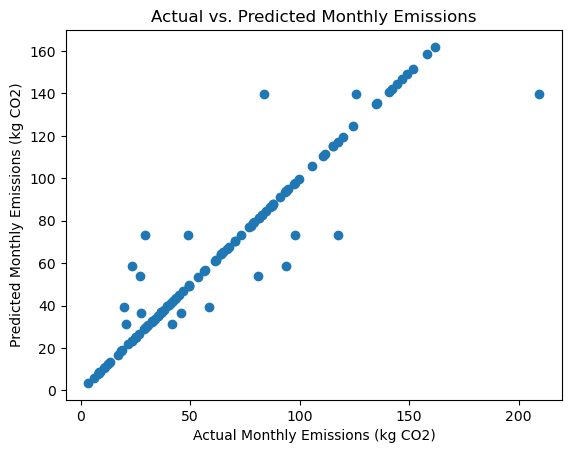

In [25]:
plt.scatter(y_train, predictions)
plt.xlabel('Actual Monthly Emissions (kg CO2)')
plt.ylabel('Predicted Monthly Emissions (kg CO2)')
plt.title('Actual vs. Predicted Monthly Emissions')
plt.show()


### Recommender 

In [29]:

# Function to handle existing users and predict carbon emissions
def predict_carbon_emission(user_type, username=None, start_location=None, end_location=None):
    if user_type.lower() == "existing":
        if username is None:
            username = input("Enter your username: ")

        user_info = data[data['User Name'] == username].iloc[0]
        start_location = user_info["Start Location"]
        end_location = user_info["End Location"]
        print(f"Existing user: {username}, Start Location: {start_location}, End Location: {end_location}")
        mode_of_transport = user_info["Mode of Transport"]
        fuel_type = user_info["Fuel Type"]
        distance = user_info["Distance Traveled (In Miles)"]
        frequency = user_info['Frequency(Per Week)']
        emission = user_info["Monthly Emissions (kg CO2)"]

        print(f"Monthly Emissions (kg CO2): {emission}")
        frequency_per_month = 4  # Assuming 4 weeks in a month
        total_distance = distance * frequency * frequency_per_month
        emission_factors = emission_factors_car if mode_of_transport == 1 else emission_factors_bike
        acceptable_range = 0.158 * total_distance if mode_of_transport == 1 else 0.18 * total_distance
        print(f"Acceptable range of Monthly Emissions (kg CO2): {acceptable_range}")

        if emission > acceptable_range:
            print(f"Consider using Public Transport to reduce carbon emissions.")
        else:
            print(f"Your carbon emissions are within an acceptable range.")

        # Check for carpooling possibilities
        carpool_suggestions = []
        for _, existing_user_info in data[data['User Name'] != username].iterrows():
            if existing_user_info["Start Location"] == start_location and existing_user_info["End Location"] == end_location:
                carpool_suggestions.append(existing_user_info['User Name'])

        if carpool_suggestions:
            carpool_suggestions_str = ', '.join(carpool_suggestions)
            print(f"Carpooling suggestion: You can carpool with {carpool_suggestions_str}. If you want to decrease your Co2 Footprint")

    
    elif user_type.lower() == "new":
        mode_of_transport = input("Enter mode of transport (Car, Bike): ")
        distance = float(input("Enter distance traveled in miles: "))

        while distance == 0:
            print("Distance is zero. Please provide a valid distance for accurate predictions.")
            distance = float(input("Enter a valid distance traveled in miles: "))
        fuel_type = input("Enter fuel type (e.g., gasoline, electric): ")
        frequency = int(input("Enter frequency per week:"))
        fuel_efficiency = int(input("Fuel efficiency:"))

        fuel_type_encoded = label_encoders['Fuel Type'].transform([fuel_type])[0]
        total_distance = distance * frequency * 4  # Assuming 4 weeks in a month

        if mode_of_transport.lower() == 'car':
            emission_factors = emission_factors_car
            acceptable_range = 0.158 * total_distance
        elif mode_of_transport.lower() == 'bike':
            emission_factors = emission_factors_bike
            acceptable_range = 0.18 * total_distance

        feature_names = ['Distance Traveled (In Miles)', 'Fuel Type', 'Fuel Efficiency']
        X_test_for_prediction = pd.DataFrame([[total_distance, fuel_type_encoded, fuel_efficiency]],
                                             columns=feature_names)
        carbon_emission = 4 * model_decision_tree.predict(X_test_for_prediction)[0]

        carpool_suggestions = []
        for _, existing_user_info in data.iterrows():
            if existing_user_info["Start Location"] == start_location and existing_user_info[
                "End Location"] == end_location:
                carpool_suggestions.append(existing_user_info['User Name'])

        if carpool_suggestions:
            carpool_suggestions_str = ', '.join(carpool_suggestions)
            print(f"Carpooling suggestion: You can carpool with {carpool_suggestions_str}.")
            print(f"or")
            
            
        if fuel_type.lower() == "gasoline" and carbon_emission > acceptable_range:
            print(
                f"Consider using Public Transport to reduce carbon emissions for your gasoline vehicle. (Emission Factor: {emission_factors.get(fuel_type.lower(), 'Unknown')})\nPredicted Carbon Emission: {carbon_emission:.2f} kg CO2")
            print(f"Acceptable range of Monthly Emissions (kg CO2): {acceptable_range}")
        elif fuel_type.lower() == "electric" and carbon_emission > acceptable_range:
            print(
                f"Consider using Public Transport to reduce carbon emissions for your electric vehicle. (Emission Factor: {emission_factors.get(fuel_type.lower(), 'Unknown')})\nPredicted Carbon Emission: {carbon_emission:.2f} kg CO2")
            print(f"Acceptable range of Monthly Emissions (kg CO2): {acceptable_range}")
        else:
            # Emissions are within an acceptable range
            print(
                f"Your carbon emissions are within an acceptable range. (Emission Factor: {emission_factors.get(fuel_type.lower(), 'Unknown')})\nPredicted Carbon Emission: {carbon_emission:.2f} kg CO2")
            print(f"Acceptable range of Monthly Emissions (kg CO2): {acceptable_range}")

# Example usage
user_type_input = input("Are you an existing user or a new user? Enter 'existing' or 'new': ")

if user_type_input.lower() == "existing":
    username_input = input("Enter your username: ")
    predict_carbon_emission("existing", username=username_input)
else:
    start_location_input = input("Enter start location: ")
    end_location_input = input("Enter end location: ")
    predict_carbon_emission("new", start_location=start_location_input, end_location=end_location_input)


Are you an existing user or a new user? Enter 'existing' or 'new': existing
Enter your username: Kim Smith
Existing user: Kim Smith, Start Location: Sunnyvale, End Location: San Francisco
Monthly Emissions (kg CO2): 209.52
Acceptable range of Monthly Emissions (kg CO2): 90.0
Consider using Public Transport to reduce carbon emissions.
Carpooling suggestion: You can carpool with Robert Downey, Kai Le, Jacob Cheng, Peyton Edwards, Theodore Bui, Jack Rogers. If you want to decrease your Co2 Footprint
